# Exercise 5

### 1. Estimate the integral $\int ^1 _0 e^x dx$  by simulation (the crude Monte estimator). Use eg. an estimator based on 100 samples and present the result as the point estimator and a confidence interval.

In order to estimate the following integral:
$$
\int_{0}^{1} e^x dx
$$
we use the crude Monte-Carlo estimator by simulation.

First, we let $U_1,\dots,U_n\sim\text{Uniform}(0,1)$. Then, we can write:
$$
\int_{0}^{1} e^x dx = \text{E}[e^U]
$$

This we can use to simulate $n=100$ samples of $U$ and thus, compute the point estimator $\hat{\theta}$:
$$
\hat{\theta} = \frac{1}{n}\sum_{i=1}^n e^{U_i}
$$
We perform 10 runs, of 100 samples each:


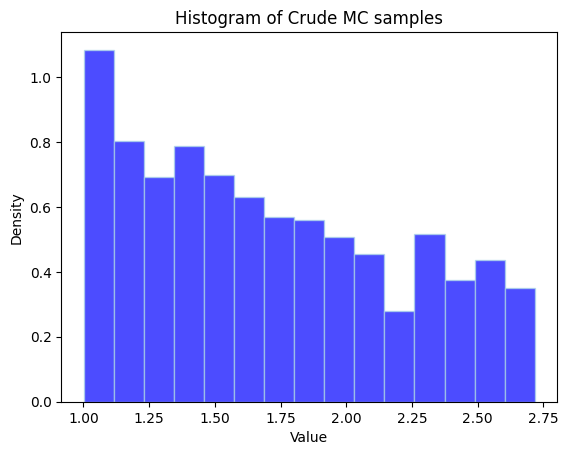

Mean estimate of the integral: 1.7062
Sample variance: 0.242708
95% confidence interval: (1.6756, 1.7367)


In [10]:
import numpy as np
import scipy.stats as stats
from scipy.stats import uniform, norm, expon
import matplotlib.pyplot as plt

samples = uniform.rvs(size=(10, 100))

xs = np.exp(samples)

all_samples = xs.flatten()

plt.hist(all_samples, bins=15, density=True, alpha=0.7, color='blue', edgecolor='lightblue')
plt.title("Histogram of Crude MC samples")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

mean = np.mean(all_samples)
variance = np.var(all_samples, ddof=1)
standard_error = np.std(all_samples, ddof=1) / np.sqrt(len(all_samples))
z = 1.96 
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error

print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")

The histogram is right-skewed, meaning more values are located to the left in plot, also reflecting the nature of an exponential function.

Furthermore, the mean estimate is closely alligned to the integral's true value $e-1\approx1.718$, while the true integral value is also within the confidence bounds. Thus, Monte Carlo estimator provides an appropriate approximation. 

### 2. Estimate the integral $\int ^1 _0 e^x dx$ using antithetic variables, with comparable computer ressources.

To estimate 
$$
\int_{1}^{0} e^x dx
$$

using antithetic variables, we will utilize the variance reduction technique. Herein, we average each function $e^U$ with its antithetic pair $e^{1-U}$, aiming to cancel out any variation. We perform 10 runs, of 100 samples each:

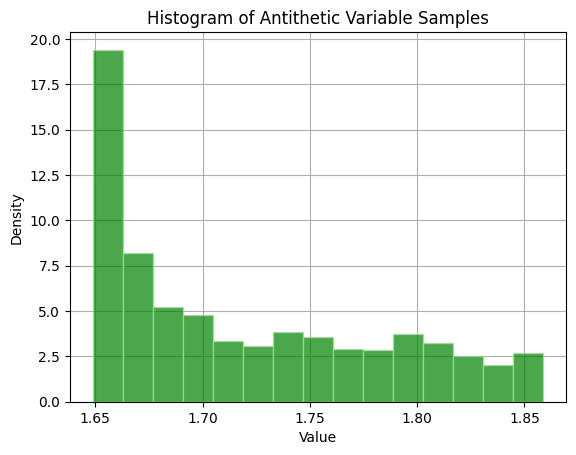

Mean estimate of the integral: 1.7188
Sample variance: 0.004073
95% confidence interval: (1.7148, 1.7227)


In [12]:
x_antithetic = (np.exp(samples) + np.exp(1 - samples)) / 2

all_samples = x_antithetic.flatten()
plt.figure()
plt.grid(True, zorder=0)
plt.hist(all_samples, bins=15, density=True, alpha=0.7,
         color='green', edgecolor='lightgreen', zorder=3)
plt.title("Histogram of Antithetic Variable Samples")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

mean = np.mean(all_samples)
variance = np.var(all_samples, ddof=1)
standard_error = np.std(all_samples, ddof=1) / np.sqrt(len(all_samples))
z = 1.96
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error
print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")

The distribution in the histogram are more concentrated, having a narrower spread and a higher peak, alluding to an exponential distribution more. It also has a lower variance than the previous method. 

As for the mean of 1.7188, it approximates $e-1\approx1.718$ more than the previous method, while this method also has a narrower confidence interval.

### 3. Estimate the integral $\int ^1 _0 e^x dx$ using a control variable, with comparable computer ressources.

Estimating the integral using a control variate, we use $U\sim\text{Uniform}(0,1)$ as the control variate. We apply the corrected estimator:
$$
\hat{\theta}_{cv} = \bar{X}+c(Y-\text{E}[Y])
$$
where $c$ is chosen as to minimize the variance. As the slides say, we set $c=-0.14086 \cdot 12$:


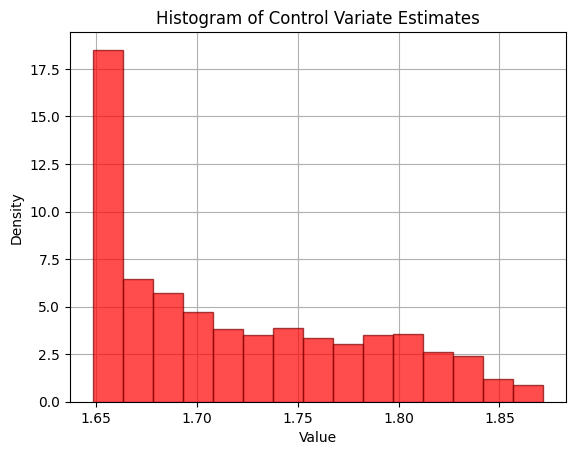

Mean estimate of the integral: 1.7189
Sample variance: 0.003939
95% confidence interval: (1.7150, 1.7228)


In [22]:
u = uniform.rvs(size=(10, 100))  
x = np.exp(u)      
c = -0.14086 * 12  
corrected = x + c * (u - 0.5)
all_samples = corrected.flatten()

plt.figure()
plt.grid(True, zorder=0)
plt.hist(all_samples, bins=15, density=True, alpha=0.7,
         color='red', edgecolor='maroon', zorder=3)
plt.title("Histogram of Control Variate Estimates")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

mean = np.mean(all_samples)
variance = np.var(all_samples, ddof=1)
standard_error = np.std(all_samples, ddof=1) / np.sqrt(len(all_samples))
z = 1.96
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error
print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")



This is quite similar to the previous method and also has almost the same variance. Furthermore, the estimate and the confidence intervals are quite similar to the previous method, where the true integral value of $e-1=1.718$ is within the confidence interval, indidcating that utilizing control variates is also a valid approximation of the integral 

### 4. Estimate the integral $\int ^1 _0 e^x dx$ using stratified sampling, with comparable computer ressources

Using the stratified sampling method, we split the interval [0,1] into $n=100$ equal-width subintervals (strata). Here, in each subinterval $[\frac{i-1}{100}, \frac{i}{100}]$, one sample is drawn, ensuring even coverage, and reducing variance.

To compute the mean and the 95% confidence interval of the stratified sampling estimator, we repeat the full stratified sampling procedure a 1000 times. The resulting estimates are then used to calculate the sample mean and standard deviation, from which the confidence interval is constructed using the normal approximation.

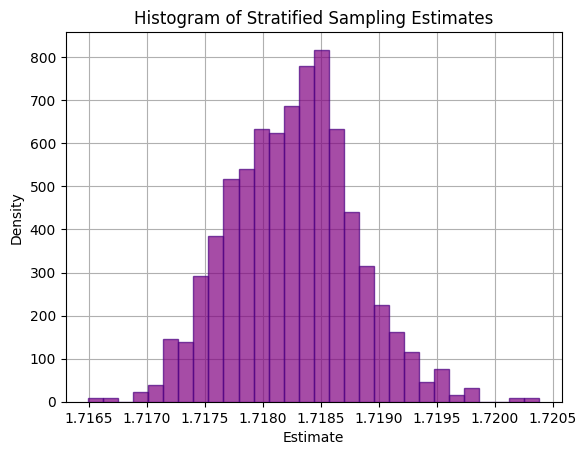

Mean estimate of the integral: 1.7183
Sample variance: 0.000000
95% confidence interval: (1.7182, 1.7183)


In [30]:
n_strata = 100
reps = 1000
estimates = []
for _ in range(reps):
    strata_edges = np.linspace(0, 1, n_strata + 1)
    samples = np.array([
        np.random.uniform(low=strata_edges[i], high=strata_edges[i+1])
        for i in range(n_strata)
    ])
    values = np.exp(samples)
    estimates.append(np.mean(values))  

estimates = np.array(estimates)
plt.figure()
plt.grid(True, zorder=0)
plt.hist(estimates, bins=30, density=True, alpha=0.7,
         color='purple', edgecolor='indigo', zorder=3)
plt.title("Histogram of Stratified Sampling Estimates")
plt.xlabel("Estimate")
plt.ylabel("Density")
plt.show()
mean = np.mean(estimates)
variance = np.var(estimates, ddof=1)
standard_error = np.std(estimates, ddof=1) / np.sqrt(len(estimates))
z = 1.96
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error
print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")

Surprisingly, using the stratified sampling method does not result in an exponential-shaped distribution, but instead produces a distribution that closely resembles a normal distribution. This occurs due to the Central Limit Theorem: even though each individual sample from $\exp(U)$ follows a skewed distribution, the average of many independent estimates approximate a normal distribution.

This result in a mean estimate of the integral closest to $e-1\approx1.718$, where the variance is miniscule. Furthermore, this method has also has the narrowest confidence interval.

##  5. Use control variates to reduce the variance of the estimator in exercise 4 (Poisson arrivals).

To further reduce the variance by using the control variates, we combine stratified sampling and control variate methods. Specifically, we seek the the corrected estimator $\hat{\theta}_{cv}$:
$$
\hat{\theta}_{cv} = \bar{X}+c(Y-\text{E}[Y])
$$
while using stratified values (100 statra, for 1000 repitions):

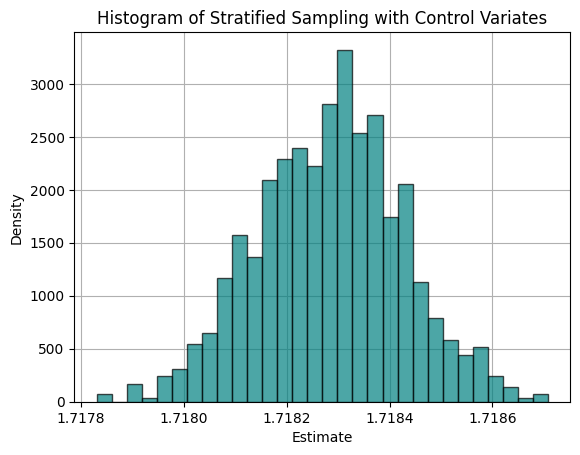

Mean estimate of the integral: 1.7183
Sample variance: 0.000000
95% confidence interval: (1.7183, 1.7183)


In [32]:
n_strata = 100
reps = 1000
estimates_cv = []

c = -0.14086 * 12  
for _ in range(reps):
    strata_edges = np.linspace(0, 1, n_strata + 1)
    u_samples = np.array([
        np.random.uniform(low=strata_edges[i], high=strata_edges[i+1])
        for i in range(n_strata)
    ])
    x_values = np.exp(u_samples)

    crude_estimate = np.mean(x_values)
    u_mean = np.mean(u_samples)
    estimate_cv = crude_estimate + c * (u_mean - 0.5)
    
    estimates_cv.append(estimate_cv)

estimates_cv = np.array(estimates_cv)

plt.figure()
plt.grid(True, zorder=0)
plt.hist(estimates_cv, bins=30, density=True, alpha=0.7,
         color='teal', edgecolor='black', zorder=3)
plt.title("Histogram of Stratified Sampling with Control Variates")
plt.xlabel("Estimate")
plt.ylabel("Density")
plt.show()

mean = np.mean(estimates_cv)
variance = np.var(estimates_cv, ddof=1)
standard_error = np.std(estimates_cv, ddof=1) / np.sqrt(len(estimates_cv))
z = 1.96
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error

print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")


This method has the lowest variance and width of confidence intervals, laying nicely around the mean. Thus, this method has so far proved the most decent estimating the value of the integral, $e-1\approx1.718$.

### 6. Demonstrate the effect of using common random numbers in exercise 4 for the difference between Poisson arrivals (Part 1) and a renewal process with hyperexponential interarrival times. Remark: You might need to do some thinking and some re-programming.

Now, we will return to exercise 4.1 and take some of the code as for inspiration.

We have set up the same system, but we compare the blocking abilities two systems: one with Poisson arrivals and one with hyperexponential interarrival times. Now, we will reimplement them but with Common Random Numbers (CRNs), hopefully reducing the variance of the difference between the systems:

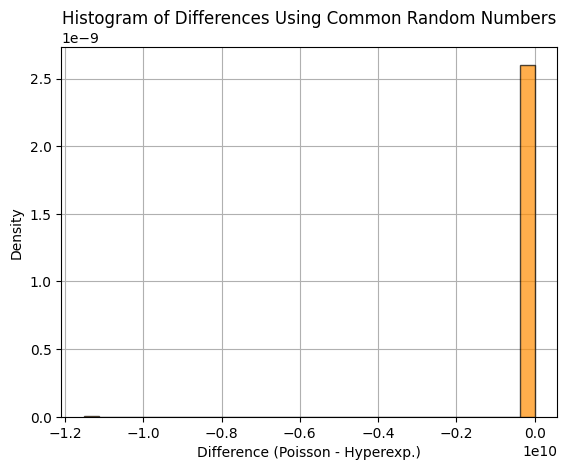

Mean difference: -11549467.6640
Sample variance of difference: 132657075370880944.000000
95% confidence interval for difference: (-34124130.9117, 11025195.5836)


In [33]:
n_strata = 100
reps = 1000
diff_estimates = []

for _ in range(reps):
    strata_edges = np.linspace(0, 1, n_strata + 1)

    u_samples = np.array([
        np.random.uniform(low=strata_edges[i], high=strata_edges[i+1])
        for i in range(n_strata)
    ])

    poisson_values = np.exp(u_samples)

    rate1, rate2 = 2.0, 0.5   
    probs = 0.5               
    mask = u_samples < probs
    hyper_samples = np.where(mask,
                             -np.log(np.random.uniform(size=n_strata)) / rate1,
                             -np.log(np.random.uniform(size=n_strata)) / rate2)
    
    hyper_values = np.exp(hyper_samples)
    
    diff = np.mean(poisson_values) - np.mean(hyper_values)
    diff_estimates.append(diff)

diff_estimates = np.array(diff_estimates)
plt.figure()
plt.grid(True, zorder=0)
plt.hist(diff_estimates, bins=30, density=True, alpha=0.7,
         color='darkorange', edgecolor='black', zorder=3)
plt.title("Histogram of Differences Using Common Random Numbers")
plt.xlabel("Difference (Poisson - Hyperexp.)")
plt.ylabel("Density")
plt.show()

mean = np.mean(diff_estimates)
variance = np.var(diff_estimates, ddof=1)
standard_error = np.std(diff_estimates, ddof=1) / np.sqrt(len(diff_estimates))
z = 1.96
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error

print(f"Mean difference: {mean:.4f}")
print(f"Sample variance of difference: {variance:.6f}")
print(f"95% confidence interval for difference: ({ci_lower:.4f}, {ci_upper:.4f})")

The results show that while the hypterexponential distributed system has a somewhat lower blocing probability than the Poisson distributed system, the system performs best with Common Random Numbers. Specifically, the CRNs ensure that the variance of the difference estimator is reduced, making it statistically more stable. 

### 7. For a standard normal random variable Z ∼ N(0, 1) using the crude Monte Carlo estimator estimate the probability Z > a. Then try importance sampling with a normal density with mean a and variance σ2. For the expirements start using σ2 = 1, use different values of a (e.g. 2 and 4), and different sample sizes. If time permits experiment with other values for σ2. Finally discuss the efficiency of the methods.


To estimate $\text{P}(Z>a)$ for $Z\sim \text{N}(0,1)$ using the crude Monte-Carlo and importance sampling methods. For importance sampling, we use a $\text{N}(0,1)$ and apply a likelihood ratio weighting. The experiments are done for the values $a\in\{2,4\}$, $n\in\{1000,10000\}$, and $\sigma^2=1$, to compare the accuracies and variances:

In [29]:
for a in [2, 4]:
    print(f"a = {a}")
    print(f"Analytical solution: {1 - norm.cdf(a):.6f}")
    for n in [10, 100, 1000, 10_000]:
        print(f"N = {n}")
        zs = norm.rvs(size=n)
        
        crude = np.mean(zs > a)

        ys = norm.rvs(size=n, loc=a, scale=1)

        imp_sampl = np.mean((ys > a) * norm.pdf(ys) / norm.pdf(ys, loc=a, scale=1))

        print(f"Crude estimate:      {crude:.6f}")
        print(f"Importance sampling: {imp_sampl:.6f}")

a = 2
Analytical solution: 0.022750
N = 10
Crude estimate:      0.000000
Importance sampling: 0.011296
N = 100
Crude estimate:      0.000000
Importance sampling: 0.023188
N = 1000
Crude estimate:      0.023000
Importance sampling: 0.022988
N = 10000
Crude estimate:      0.020500
Importance sampling: 0.022977
a = 4
Analytical solution: 0.000032
N = 10
Crude estimate:      0.000000
Importance sampling: 0.000029
N = 100
Crude estimate:      0.000000
Importance sampling: 0.000028
N = 1000
Crude estimate:      0.000000
Importance sampling: 0.000031
N = 10000
Crude estimate:      0.000000
Importance sampling: 0.000031


From this, we can conclude the following:

- For $a=2$, both the crude Monte-Carlo and importance sampling produce reasonable estimates, but importance sampling has lower variance, making it more efficient.
- For $a=4$, crude Monte Carlo fails  (probability = 0), while importance sampling still gives a valid, low-variance estimate.

This demonstrates that importance sampling is especially valuable for rare event estimation, wherein crude Monte Carlo becomes unreliable.

### 8. Use importance sampling with g(x) = λ exp (−λ ∗ x) to calculate the integral $\int ^1 _0 e^x dx$ of Question 1. Try to find the optimal value of λ by calculating the variance of h(X)f(X)/g(X) and verify by simulation. Note that importance sampling with the exponential distribution will not reduce the variance.

To estimate the integral of Question 1, we use importance sampling, by sampling from the following exponential distribution:
$$
g(x) = \lambda e ^{\lambda x}, \quad x\in[0,1]
$$

In order to find the optimal value for $\lambda$, we calculate the variance of $\frac{h(X)\cdot f(X)}{g(X)}$ and verify it by simulation. We simulate $n=10000$ runs.


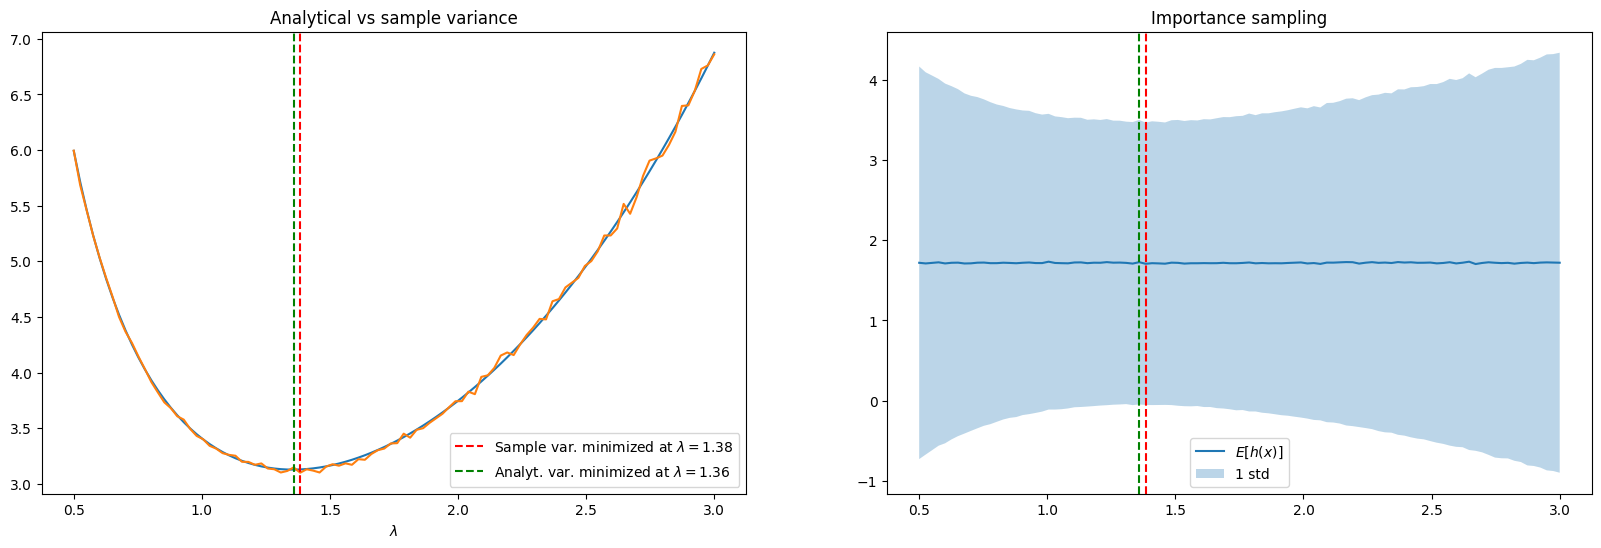

In [30]:
n = 100
vars = np.empty(n)
means = np.empty(n)
lambdas = np.linspace(0.5, 3.0, n)

def analytical_variance(xs):
    squared_variance = (np.exp(1) - 1) ** 2
    variance_of_square = 1/xs * 1/(2 + xs) * (np.exp(2 + xs) - 1)
    return variance_of_square - squared_variance


for i, gamma in enumerate(lambdas):
    g = expon(scale=1/gamma)
    gs = g.rvs(size=100_000)

    # remember to include the uniform pdf, since the exponential
    # has support outside [0, 1)
    samples = np.exp(gs) * uniform.pdf(gs) / g.pdf(gs)

    means[i] = np.mean(samples)
    vars[i] = np.var(samples)

min_idx = np.argmin(vars)

stds = np.sqrt(vars)

analyt_vars = analytical_variance(lambdas)
analyt_min_idx = np.argmin(analyt_vars)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title("Analytical vs sample variance")
ax1.plot(lambdas, analyt_vars)
ax1.plot(lambdas, vars)
ax1.set_xlabel(r"$\lambda$")
ax1.axvline(lambdas[min_idx], linestyle="--", color="r", label=f"Sample var. minimized at $\\lambda = {lambdas[min_idx]:.2f}$")
ax1.axvline(lambdas[analyt_min_idx], linestyle="--", color="g", label=f"Analyt. var. minimized at $\\lambda = {lambdas[analyt_min_idx]:.2f}$")
ax1.legend()

ax2.plot(lambdas, means, label=r"$E[h(x)]$")
ax2.fill_between(lambdas, means - stds, means + stds, alpha=0.3, label='1 std')
ax2.axvline(lambdas[min_idx], linestyle="--", color="r")
ax2.axvline(lambdas[analyt_min_idx], linestyle="--", color="g")
ax2.set_title("Importance sampling")
ax2.legend()
plt.show()